In [ ]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [ ]:
!pip install nvidia-pyindex
!pip install pytorch-quantization

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from super_gradients.training import models


In [ ]:
from torchinfo import summary

In [ ]:
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

[2023-05-26 11:38:24] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


  0%|          | 0.00/256M [00:00<?, ?B/s]

In [ ]:
summary(model=yolo_nas_l, 
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

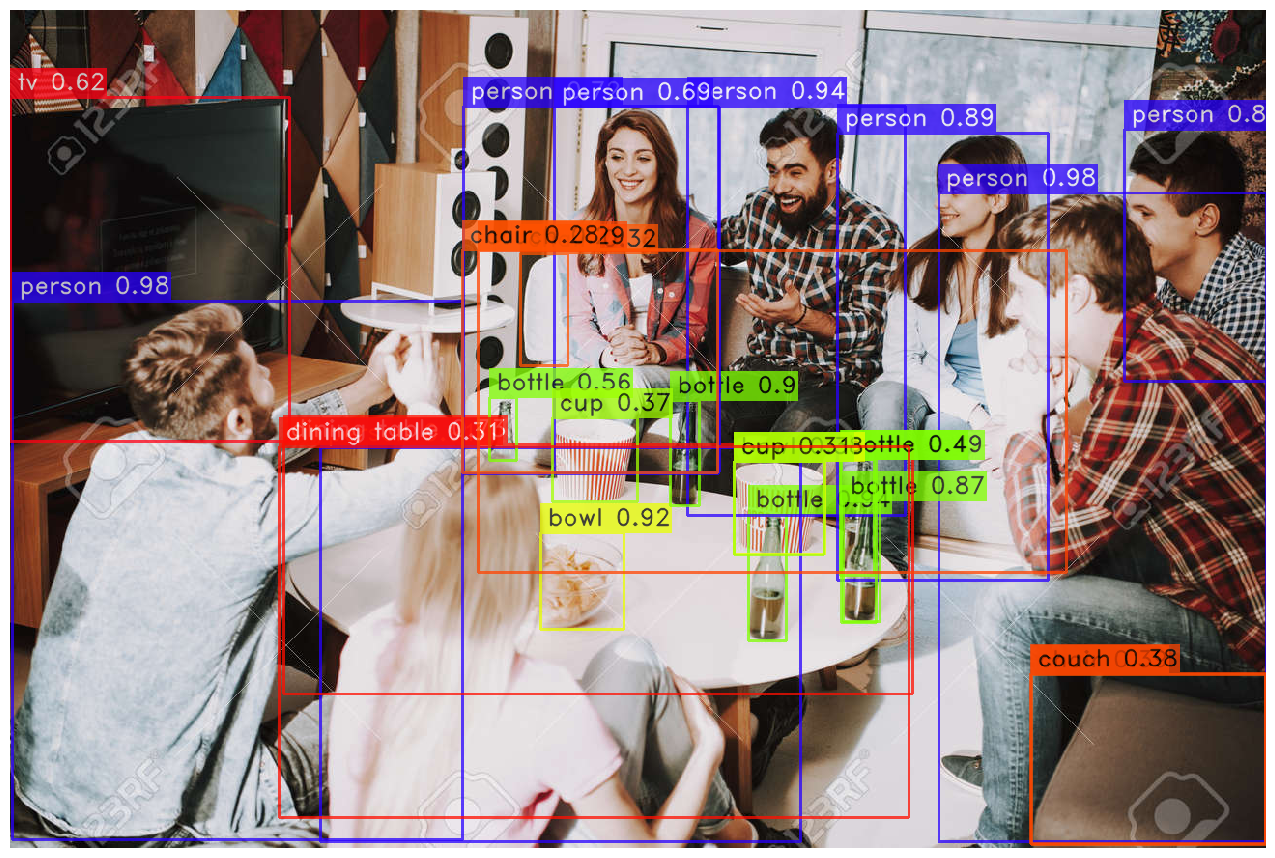

In [ ]:
url = "https://previews.123rf.com/images/freeograph/freeograph2011/freeograph201100150/158301822-group-of-friends-gathering-around-table-at-home.jpg"
yolo_nas_l.predict(url, conf=0.25).show()

In [ ]:
!gdown "https://drive.google.com/uc?id=1q-sNrJfUi6PjvT8mFfEw1Cq4eCavdklK&confirm=t"

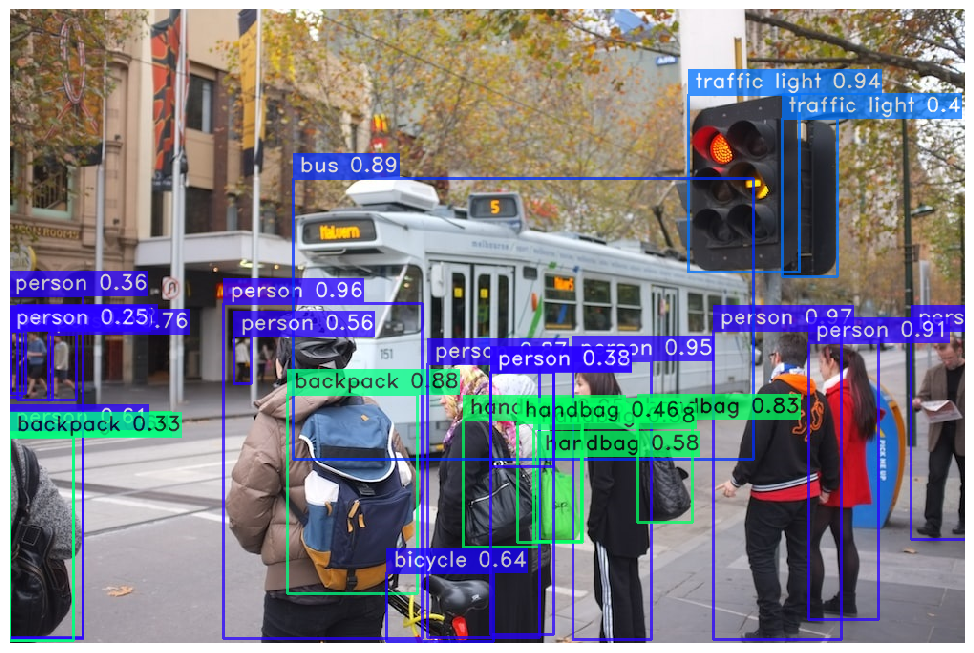

In [ ]:
image_path = '/content/image1.jpg'
yolo_nas_l.predict(image_path, conf=0.25).show()

In [ ]:
!gdown "https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t
To: /content/demo.mp4
100% 11.5M/11.5M [00:00<00:00, 107MB/s]


In [ ]:
input_video_path = f"/content/sample.mp4"
output_video_path = "detections.mp4"

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [ ]:
yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 897/897 [00:40<00:00, 21.94it/s]


In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!cp -r '/content/result_compressed.mp4' '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/detections.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=115RBSjNQ_1zjvKFRsQK2zE8v8BIRrpdy&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=115RBSjNQ_1zjvKFRsQK2zE8v8BIRrpdy&confirm=t
To: /content/testwalk.mp4
100% 7.61M/7.61M [00:00<00:00, 44.8MB/s]


In [ ]:
input_video_path = f"/content/testwalk.mp4"
output_video_path = "detections2.mp4"

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [ ]:
yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 341/341 [00:15<00:00, 21.32it/s]


In [ ]:
!rm '/content/result_compressed.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/detections2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.